#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 2) Problem statement
Explain how you can implement ML in a real world application.

Train an SVM regressor on : Bengaluru housing dataset

                  Must include in details:

                           - EDA

                            - Feature engineering 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the data set 
df = pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
#Checking the top 5 recods.

df.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Data Cleaning

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df = df.drop(["society"], axis = 1)

# Large number of rows in balcony have null values. They can be filled with mode of balcony column.

In [11]:
df['balcony'].fillna(df['balcony'].mode(), inplace=True)

In [12]:
df.dropna(axis = 0, inplace = True)

In [13]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# Data Manipulation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [15]:
df.nunique()

area_type          4
availability      78
location        1265
size              27
total_sqft      1976
bath              16
balcony            4
price           1924
dtype: int64

In [16]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [17]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [18]:
df = df.drop(["availability"], axis = 1)

In [19]:
df["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [20]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [21]:
df["size"] = df["size"].str.replace("Bedroom", "BHK")

In [22]:
df["size"].unique()

array(['2 BHK', '4 BHK', '3 BHK', '1 BHK', '1 RK', '6 BHK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', '27 BHK', '43 BHK', '14 BHK',
       '12 BHK', '10 BHK', '13 BHK'], dtype=object)

In [23]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
df["total_sqft"]= df["total_sqft"].astype(str)

In [25]:
def sqft(x):
    y = x.split("-")
    if len(y) == 2:
        return (float(y[0])+float(y[1]))/2
    elif len(y) == 1:
        return x
    else:
        return None

In [26]:
df["total_sqft"] = df["total_sqft"].apply(sqft)

In [27]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., 1258.5, '774', '4689'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12710 non-null  object 
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(3), object(4)
memory usage: 794.4+ KB


In [29]:
df["total_sqft"]= df["total_sqft"].str.replace("Sq. Meter", "")
df["total_sqft"]= df["total_sqft"].str.replace("Acres", "")
df["total_sqft"]= df["total_sqft"].str.replace("Sq. Yard", "")
df["total_sqft"]= df["total_sqft"].str.replace("s", "")
df["total_sqft"]= df["total_sqft"].str.replace("Cent", "")
df["total_sqft"]= df["total_sqft"].str.replace("Guntha", "")
df["total_sqft"]= df["total_sqft"].str.replace("Ground", "")

C:\Users\prave\AppData\Local\Temp\ipykernel_18796\2094026434.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["total_sqft"]= df["total_sqft"].str.replace("Sq. Meter", "")
C:\Users\prave\AppData\Local\Temp\ipykernel_18796\2094026434.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["total_sqft"]= df["total_sqft"].str.replace("Sq. Yard", "")


In [30]:
df["total_sqft"]= df["total_sqft"].astype(float)

In [31]:
df["bath"].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [32]:
df["balcony"].unique()

array([1., 3., 2., 0.])

In [33]:
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [34]:
df = df.reset_index(drop=True)

In [35]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


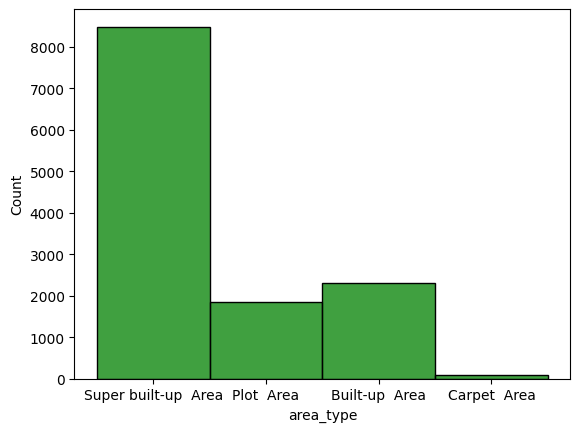

In [36]:
sns.histplot(df.area_type, color = "green")
plt.show()

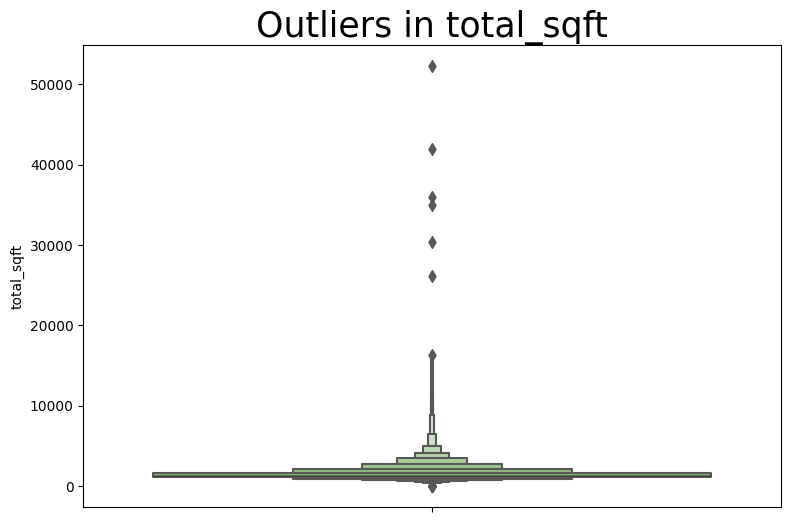

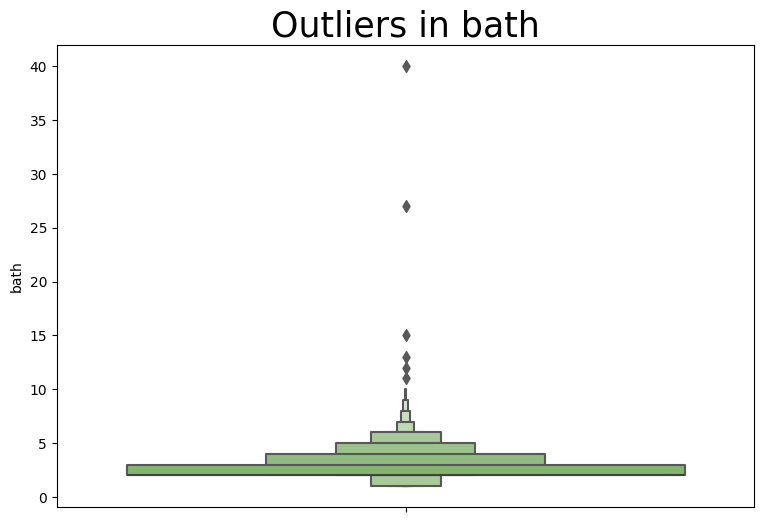

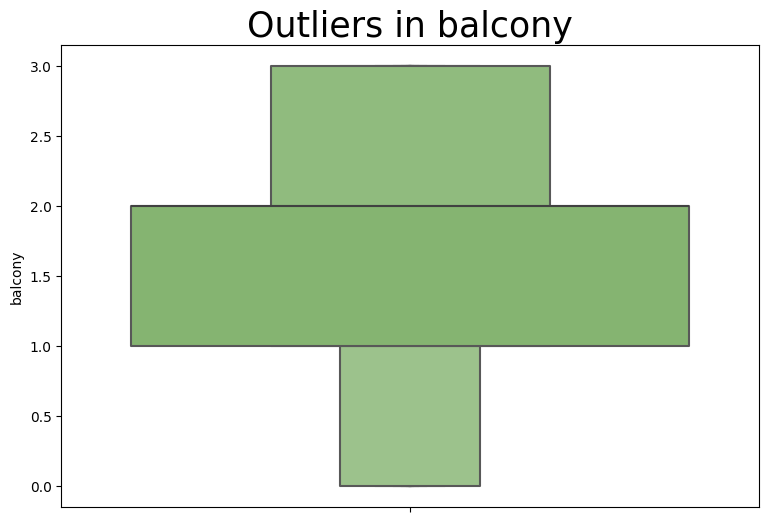

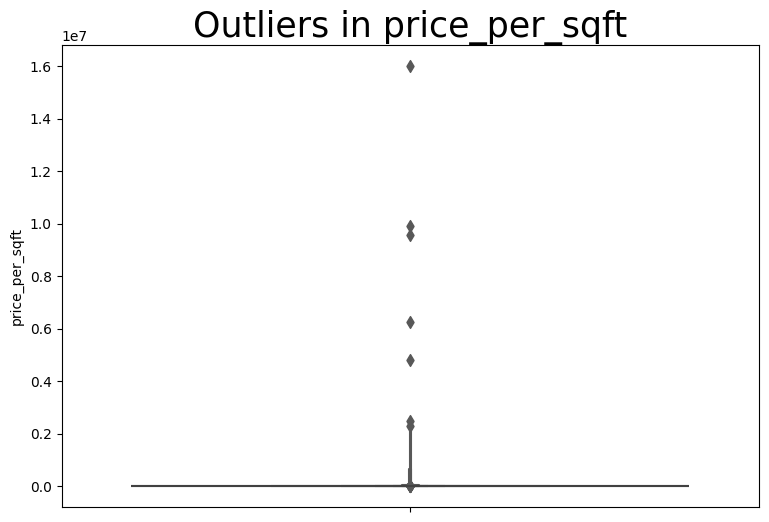

In [37]:
for col in ["total_sqft", "bath", "balcony", "price_per_sqft"]:
    plt.figure(figsize=(9,6));
    sns.boxenplot(y=col,data=df,palette='summer');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

In [38]:
print(np.where((df["total_sqft"]<100) | (df['total_sqft']>5000)))

(array([   55,   333,   390,   392,   419,   492,   501,   577,   641,
         706,   771,   967,   968,  1030,  1062,  1093,  1173,  1634,
        1794,  1921,  2002,  2489,  2682,  2740,  2880,  2984,  2995,
        3008,  3023,  4021,  4084,  4555,  4714,  4723,  5121,  5179,
        5194,  5382,  5671,  5677,  5990,  6018,  6022,  6223,  6499,
        6681,  6736,  6758,  6805,  6884,  6954,  6973,  7231,  7344,
        7379,  7439,  7469,  7507,  7761,  7783,  7829,  8119,  8209,
        8245,  8302,  8513,  8730,  8782,  8786,  8890,  8963,  8978,
        9132,  9264,  9331,  9396,  9410,  9456,  9585,  9593,  9816,
        9936,  9993,  9996, 10240, 10558, 10617, 10788, 10903, 11015,
       11032, 11068, 11214, 11306, 11358, 11437, 11673, 11695, 11791,
       11804, 11903, 11998, 12111, 12396, 12498, 12522, 12600, 12624],
      dtype=int64),)


In [39]:
df = df[(df["total_sqft"] >= 100) | (df["total_sqft"] <= 5000)]

In [40]:
print(np.where(df["bath"]<10))

(array([    0,     1,     2, ..., 12563, 12564, 12565], dtype=int64),)


In [41]:
df = df[(df["bath"] <= 10)]

In [42]:
print(np.where((df["price_per_sqft"]<1000) | (df['price_per_sqft']>50000)))


(array([  328,   387,   633,   762,   953,   954,  1016,  1048,  1633,
        1769,  3082,  4668,  5062,  5120,  5199,  5287,  5320,  5359,
        5604,  5610,  5918,  5946,  6029,  6148,  6528,  6660,  6802,
        6890,  7147,  7195,  7258,  7407,  7769,  8682,  8857,  9876,
       10662, 10884, 10936, 11067, 11556, 11761, 11846], dtype=int64),)


# Houses with price more than 50,000 per square feet are acting as outliers

In [43]:
df = df[(df["price_per_sqft"]>=1000) | (df['price_per_sqft']<=50000)]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12560 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12560 non-null  object 
 1   location        12560 non-null  object 
 2   size            12560 non-null  object 
 3   total_sqft      12560 non-null  float64
 4   bath            12560 non-null  float64
 5   balcony         12560 non-null  float64
 6   price           12560 non-null  float64
 7   price_per_sqft  12560 non-null  float64
dtypes: float64(5), object(3)
memory usage: 883.1+ KB


# Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder = LabelEncoder()
df['area_type'] = encoder.fit_transform(df['area_type'])
df['location'] = encoder.fit_transform(df['location'])
df['size'] = encoder.fit_transform(df['size'])

In [48]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,3,403,5,1056.0,2.0,1.0,39.07,3699.810606
1,2,302,7,2600.0,5.0,3.0,120.00,4615.384615
2,0,1137,6,1440.0,2.0,3.0,62.00,4305.555556
3,3,734,6,1521.0,3.0,1.0,95.00,6245.890861
4,3,693,5,1200.0,2.0,1.0,51.00,4250.000000


# Corelation of Price with different features

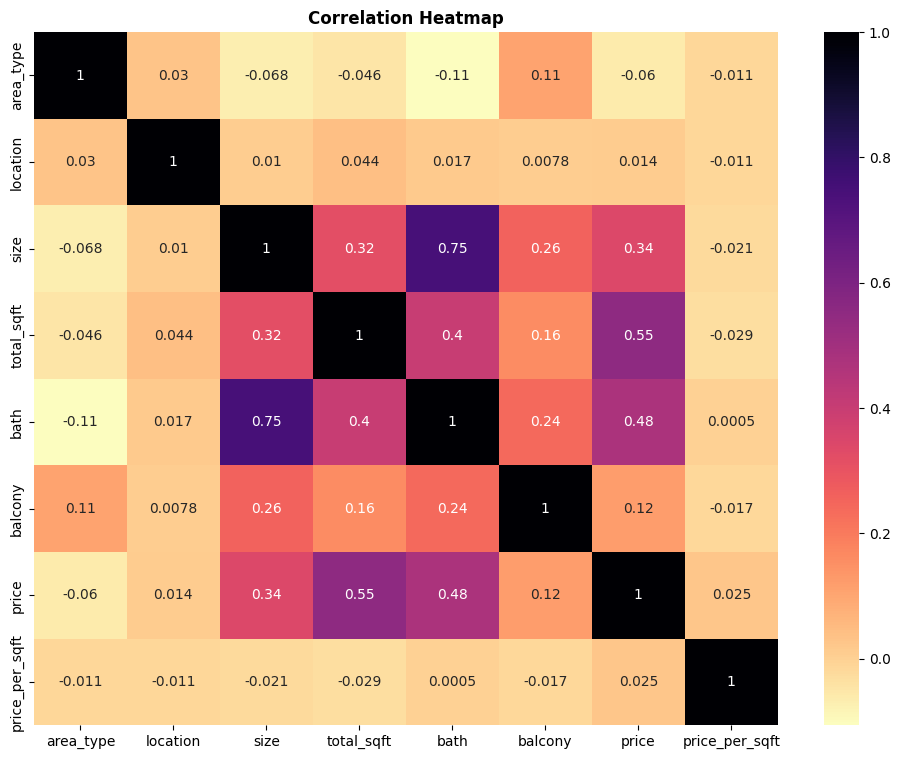

In [49]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

# area_type and location has very little correlation with price. So, these features can be removed.

In [60]:
x = df.drop(["price", "area_type", "location"], axis = 1)

In [61]:
y = df["price"]

In [62]:
# x = x.values
# y = y.values

In [63]:
x

,size,total_sqft,bath,balcony,price_per_sqft
0,5,1056.0,2.0,1.0,3699.810606
1,7,2600.0,5.0,3.0,4615.384615
2,6,1440.0,2.0,3.0,4305.555556
3,6,1521.0,3.0,1.0,6245.890861
4,5,1200.0,2.0,1.0,4250.000000
...,...,...,...,...,...
12705,6,1715.0,3.0,3.0,6530.612245
12706,8,3453.0,4.0,0.0,6689.834926
12707,5,1141.0,2.0,1.0,5258.545136
12708,7,4689.0,4.0,1.0,10407.336319


In [67]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
12705    112.00
12706    231.00
12707     60.00
12708    488.00
12709     17.00
Name: price, Length: 12560, dtype: float64

# Test Train Split

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [68]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a pipeline
svr_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', SVR())
])

# Fit the model
svr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9455.91221677701
